In [44]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.colors as colors
from scipy import stats
from scipy import integrate
import math

%matplotlib inline

In [45]:
# Modules & functions

def nmtosigma(r):
    """
    Conversion between length in nanometers to non-dimensional units, normalized by the ternary complex - ribosome contact distance
        Parameters:
            r (real): distance in nanometers
        Returns:
            output (real): distance in non-dimensional units
    """
    return r / (13 + 5.8773)


def sigmatonm(r):
    """
    Conversion between length in  non-dimensional units, normalized by the ternary complex - ribosome contact distance, to nanometers
        Parameters:
            r (real): distance in non-dimensional units
        Returns:
            output (real): distance in nanometers
    """
    return r * (13 + 5.8773)

$\textbf{FIGURE 2B}$: Plotting the static structure factor $S(q)$ for isotropic $16\, k_\mathrm{B}T$ (solid lines) and purely repulsive hard sphere (dashed line) voxels.

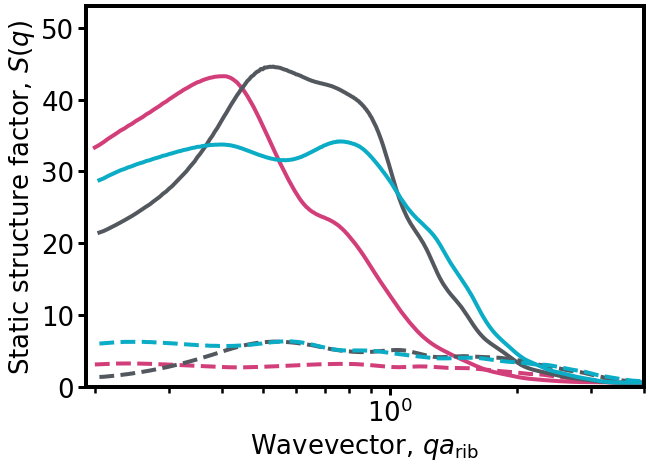

In [46]:
fig, ax = plt.subplots()

sigma = (13 + 5.8773)/0.72605 #nm
phi_list = [22, 36, 41]
colors_list = ['#d23e79', '#53585F', '#0bacc5']

for i in range(0,len(phi_list)):
    ssf_alleps = np.loadtxt('../Data/FIG2B_S2_S9__StaticStructureFactor/ssf_alleps_f{}.txt'.format(phi_list[i]))
    q = ssf_alleps[:,0]
    q = [x/2 for x in q]
    ssf_eps0 = ssf_alleps[:,1]
    ssf_eps16 = ssf_alleps[:,4]
    ax.plot(q, ssf_eps0, color=colors_list[i], linewidth=4, linestyle='dashed')
    ax.plot(q, ssf_eps16, color=colors_list[i], linewidth=4)

# PRINT WAVEVECTOR IN LENGTHSCALE
# for i in range(0,len(q_f22)):
#     print(q_f22[i],2*math.pi*2/q_f22[i]) 

t = ax.yaxis.get_offset_text()
t.set_size(15)
t = ax.xaxis.get_offset_text()
t.set_size(15)
for ax in fig.get_axes():
    ax.set_xlim(0.19,4)
    ax.set_xscale('log')
    ax.set_ylim(0,53)
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(4)
    ax.spines['right'].set_linewidth(4)
    ax.set_xlabel('Wavevector, $qa_{\mathrm{rib}}$',size=26)
    ax.tick_params(axis='both', labelsize=26,width=3,length=8)
    ax.tick_params(axis='both', which='minor', labelsize=16,width=2.5,length=6)
    
ax.set_ylabel('Static structure factor, $S(q)$',size=26)
        
fig.set_size_inches(10,7)
plt.savefig('./images/Fig2B.png', bbox_inches='tight', dpi=300)


$\textbf{FIGURE S2}$: Plotting the static structure factor $S(q)$ for isotropic voxels at all growth rates / volume fractions (left to right) and attraction strengths (colors).

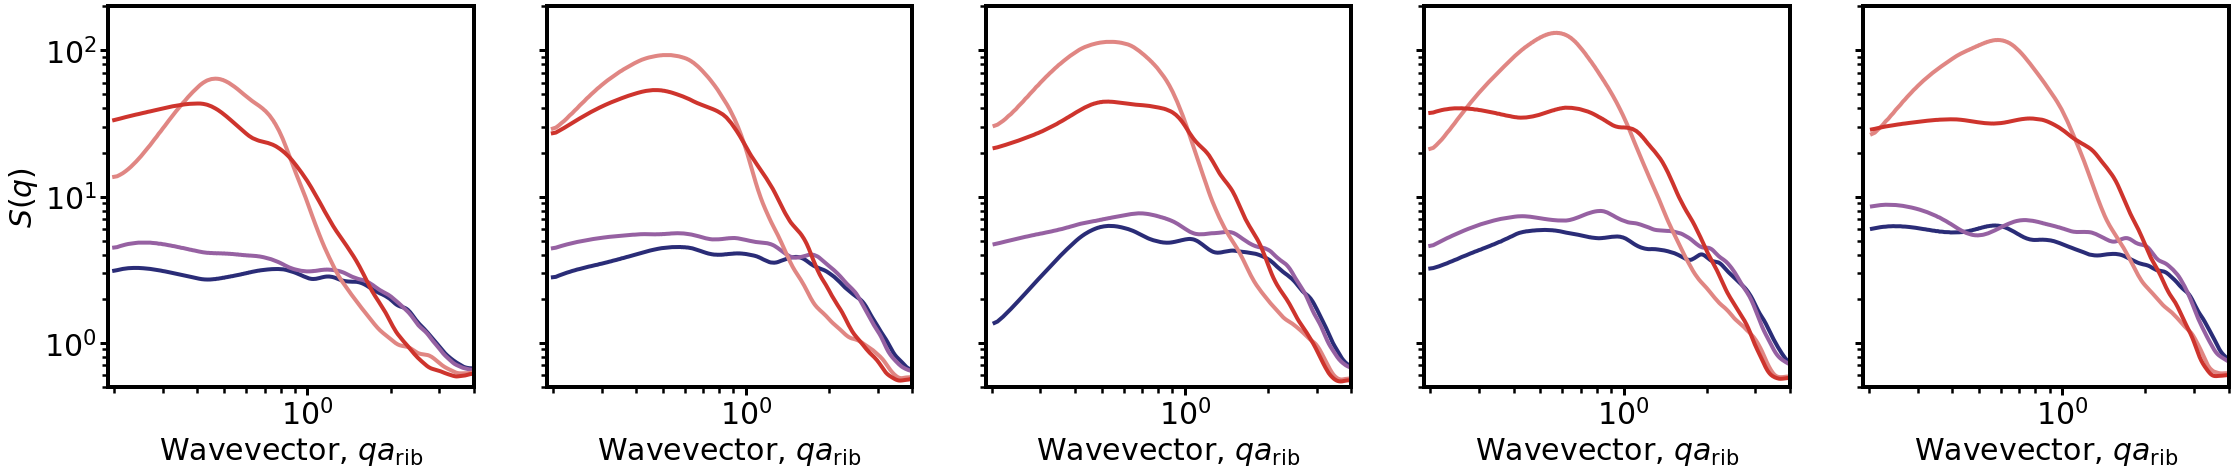

In [47]:
fig, ((ax1,ax2,ax3,ax4,ax5)) = plt.subplots(1,5)

phi_list = [22, 30, 36, 39, 41]
ax_list = [ax1,ax2,ax3,ax4,ax5]
colors_all = ['#2A2C77', '#9661A2', '#E08683', '#CE342D']

for i in range(0,len(phi_list)):
    ssf_alleps = np.loadtxt('../Data/FIG2B_S2_S9__StaticStructureFactor/ssf_alleps_f{}.txt'.format(phi_list[i]))
    q = ssf_alleps[:,0]
    q = [x/2 for x in q]
    curr_ax = ax_list[i]
    for j in range(0,4):
        ssf_eps = ssf_alleps[:,j+1]
        curr_ax.plot(q, ssf_eps, color=colors_all[j], linewidth=4)

#####

t = ax1.yaxis.get_offset_text()
t.set_size(15)
t = ax1.xaxis.get_offset_text()
t.set_size(15)
for ax in fig.get_axes():
    ax.set_xlim(0.19,4)
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylim(0.5,200)
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(4)
    ax.spines['right'].set_linewidth(4)
    ax.set_xlabel('Wavevector, $qa_{\mathrm{rib}}$',size=30)
    ax.tick_params(axis='both', labelsize=30,width=3,length=8)
    ax.tick_params(axis='both', which='minor', labelsize=16,width=2.5,length=6)
    
ax1.set_ylabel('$S(q)$',size=30)
for ax in fig.get_axes():
    ax.label_outer()
        
fig.set_size_inches(38,7)
plt.savefig('./images/FigS2.png', bbox_inches='tight', dpi=300)


$\textbf{FIGURE S9}$: Plotting the static structure factor $S(q)$ for limited-valency $16\, k_\mathrm{B}T$ (dashed line) and isotropic $16\, k_\mathrm{B}T$ and hard-sphere (solid lines) voxels.

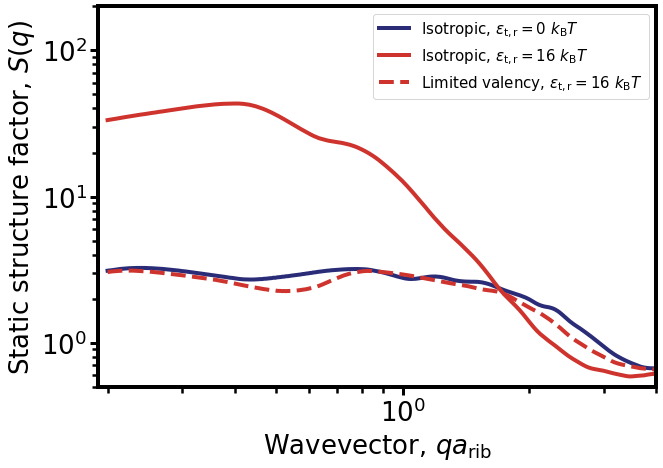

In [48]:
fig, ax = plt.subplots()

ssf_alleps_f22 = np.loadtxt('../Data/FIG2B_S2_S9__StaticStructureFactor/ssf_alleps_f22.txt')
q_f22 = ssf_alleps_f22[:,0]
q_f22 = [x/2 for x in q_f22]
ssf_eps0_f22 = ssf_alleps_f22[:,1]
ssf_eps16_f22 = ssf_alleps_f22[:,4]

ax.plot(q_f22, ssf_eps0_f22, color='#2A2C77', linewidth=4, label=r'Isotropic, $\varepsilon_\mathrm{t,r}=0 \ k_\mathrm{B}T$')
ax.plot(q_f22, ssf_eps16_f22, color='#CE342D', linewidth=4, label=r'Isotropic, $\varepsilon_\mathrm{t,r}=16 \ k_\mathrm{B}T$')

ssf_f22_e16 = np.loadtxt('../Data/FIG2B_S2_S9__StaticStructureFactor/ssf_patchy_1e16_f22.txt')
ssf_eps16_f22 = ssf_f22_e16[:,1]
ax.plot(q_f22, ssf_eps16_f22, color='#CE342D', linewidth=4, linestyle='dashed', label=r'Limited valency, $\varepsilon_\mathrm{t,r}=16 \ k_\mathrm{B}T$')

#####

t = ax.yaxis.get_offset_text()
t.set_size(15)
t = ax.xaxis.get_offset_text()
t.set_size(15)
ax.legend(prop={'size': 15},loc='upper right')
for ax in fig.get_axes():
    ax.set_xlim(0.19,4)
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylim(0.5,200)
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['top'].set_linewidth(4)
    ax.spines['right'].set_linewidth(4)
    ax.set_xlabel('Wavevector, $qa_\mathrm{rib}$',size=26)
    ax.tick_params(axis='both', labelsize=26,width=3,length=8)
    ax.tick_params(axis='both', which='minor', labelsize=16,width=2.5,length=6)
    
ax.set_ylabel('Static structure factor, $S(q)$',size=26)
fig.set_size_inches(10,7)
plt.savefig('./images/FigS9A.png', bbox_inches='tight', dpi=300)


$\textbf{FIGURE 5B}$: Plotting the radial distribution function $g(r)$ for isotropic (solid lines) and limited-valency (dashed line and symbols) cases, without attractions (blue) and with $16\, k_\mathrm{B}T$ attractions (red), in translation voxels representing 1dbl/hr growth rate.

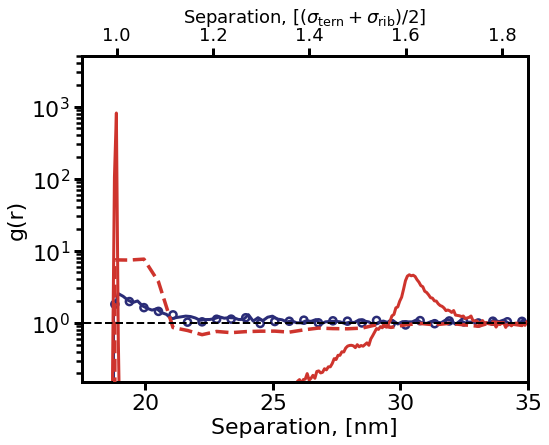

In [49]:
col = ['#2A2C77','#CE342D']
fig, ax = plt.subplots()

attr_list = [0, 16]
n_iso = [10, 4] # plotting frequency, for clarity
n_patch = [8, 4]

for i in range(0,len(attr_list)):   # PLOT ISOTROPIC
    g_r_tri_f22 = np.loadtxt('../Data/FIG5B_S5_S8__RadialDistribFunc/g_r_tri_f22_e{}.txt'.format(attr_list[i]))
    sep = np.array(g_r_tri_f22[:,0])
    g_r_tri_f22 = g_r_tri_f22[:,1]
    sep = sep*sigma
    ax.plot(sep[::n_iso[i]], g_r_tri_f22[::n_iso[i]], color=col[i], linewidth=3)

# PLOT PATCHY
g_r_tri_e0 = np.loadtxt('../Data/FIG5B_S5_S8__RadialDistribFunc/1e0gr.txt')
sep = np.array(g_r_tri_e0[:,0])
g_r_tri_e16_gr1 = g_r_tri_e0[:,1]
sep = sep*sigma
ax.scatter(sep[::n_patch[0]], g_r_tri_e16_gr1[::n_patch[0]], zorder=1, s=50, marker='o',facecolor='none', edgecolor='#2A2C77', linewidth=2.5)

g_r_tri_e0 = np.loadtxt('../Data/FIG5B_S5_S8__RadialDistribFunc/1e16gr.txt')
sep = np.array(g_r_tri_e0[:,0])
g_r_tri_e16_gr1 = g_r_tri_e0[:,1]
sep = sep*sigma
ax.plot(sep[::n_patch[0]], g_r_tri_e16_gr1[::n_patch[0]], zorder=10, linestyle='dashed',color='#CE342D',linewidth=3.5)

###

t = ax.yaxis.get_offset_text()
t.set_size(15)
t = ax.xaxis.get_offset_text()
t.set_size(15)
for ax in fig.get_axes():
    ax.set_xlim(17.5,35)
    ax.set_yscale('log')
    ax.set_ylim(0.15,5000)
    ax.spines['left'].set_linewidth(3)
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['top'].set_linewidth(3)
    ax.spines['right'].set_linewidth(3)
    ax.set_xlabel('Separation, [nm]',size=22)
    ax.set_ylabel('g(r)',size=22)
    ax.tick_params(axis='both', labelsize=22,width=3,length=8)
    ax.tick_params(axis='both', which='minor', labelsize=16,width=2.5,length=6)
    ax.plot([0,40],[1,1], color='k', linestyle='dashed', linewidth=2, zorder=100)
    secax_x = ax.secondary_xaxis('top', functions=(nmtosigma, sigmatonm))
    secax_x.set_xlabel('Separation, [$(\sigma_\mathrm{tern}+\sigma_\mathrm{rib})/2$]',size=18)
    secax_x.tick_params(labelsize=18,width=3,length=8)
    
for ax in fig.get_axes():
    ax.label_outer()
        
fig.set_size_inches(8,6)
plt.savefig('./images/Fig5B.png', bbox_inches='tight', dpi=300)


$\textbf{FIGURE S5}$: (Upper) Plotting the radial distribution function $g(r)$ for full translation voxel simulations and analytical theory for bidisperse suspensions of only ternary complexes and ribosomes. (Lower) Plotting $g(r)$ for full translation voxels and bidisperse translation voxels with added $1\, k_\mathrm{B}T$ attractions between ternary complexes and ribosomes.

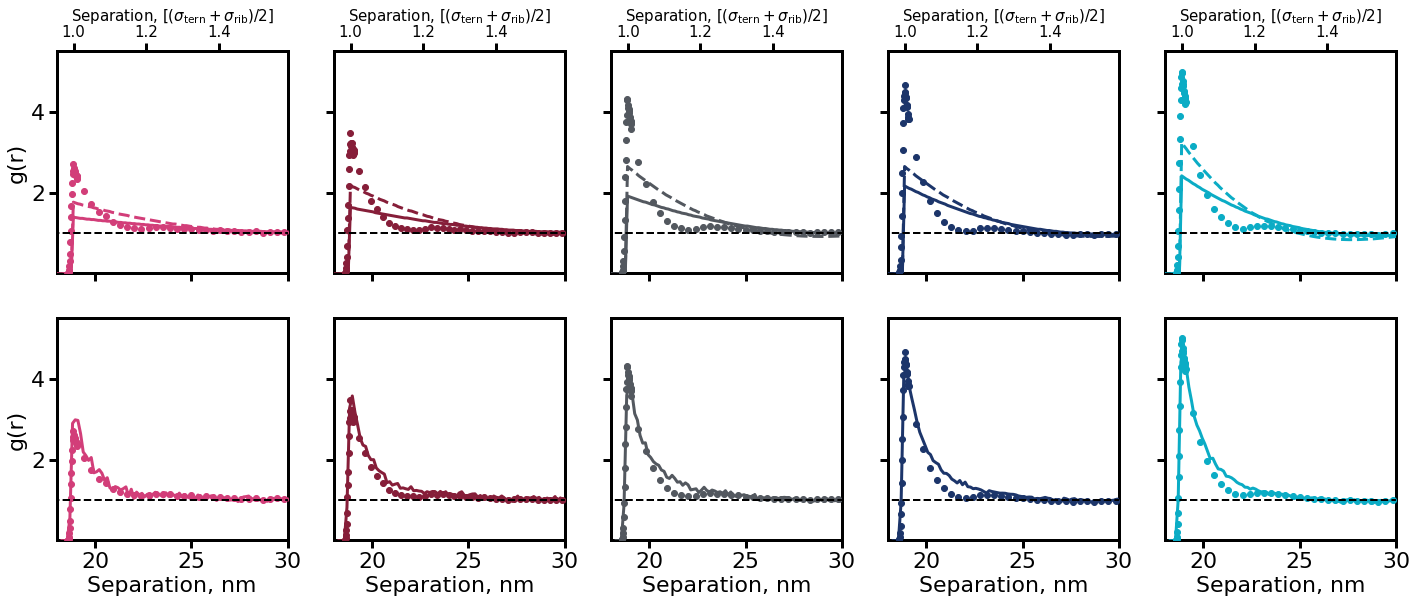

In [50]:
fig, ((ax1,ax30,ax2,ax39,ax3),(ax21,ax230,ax22,ax239,ax23)) = plt.subplots(2,5)
sigma_scale = 5.8773*2

phi_list = [22, 30, 36, 39, 41]
ax_list = [ax1,ax30,ax2,ax39,ax3]
ax2_list = [ax21,ax230,ax22,ax239,ax23]

colors_all = ['#d23e79', '#861e39', '#53585F', '#1c356a', '#0bacc5']

for i in range(0,len(phi_list)):
    
    # plotting full voxel data
    g_r_tri_e0 = np.loadtxt('../Data/FIG5B_S5_S8__RadialDistribFunc/g_r_tri_f{}_e0.txt'.format(phi_list[i]))
    g_r_tri_e0_big = np.loadtxt('../Data/FIG5B_S5_S8__RadialDistribFunc/g_r_tri_f{}_e0_big.txt'.format(phi_list[i]))
    sep = np.array(g_r_tri_e0[:,0])
    sep = sep*sigma
    sep_big = np.array(g_r_tri_e0_big[:,0])
    sep_big = sep_big*sigma
    g_r_tri_e0 = np.mean(g_r_tri_e0[:,1:4], axis=1)
    g_r_tri_e0_big = g_r_tri_e0_big[:,1]
    
    curr_ax = ax_list[i]
    curr_ax2 = ax2_list[i]
    curr_ax.plot(sep[0:28], g_r_tri_e0[0:28], color=colors_all[i], zorder=10, linewidth=0, markersize=6, marker='o')
    curr_ax.plot(sep_big, g_r_tri_e0_big, color=colors_all[i], zorder=9, linewidth=0, markersize=6, marker='o')
    curr_ax2.plot(sep[0:28], g_r_tri_e0[0:28], color=colors_all[i], zorder=10, linewidth=0, markersize=6, marker='o')
    curr_ax2.plot(sep_big, g_r_tri_e0_big, color=colors_all[i], zorder=9, linewidth=0, markersize=6, marker='o')
    
    # plotting bidisperse, same phi case
    g_r_bi_PY_dense = np.loadtxt('../Data/FIG5B_S5_S8__RadialDistribFunc/g_r_bi_f{}_PY_dense.txt'.format(phi_list[i]))
    sep = np.array(g_r_bi_PY_dense[:,0])
    g_r_bi_PY_dense = g_r_bi_PY_dense[:,2]
    sep = [(x - 0.005)*sigma_scale for x in sep]
    curr_ax.plot(sep, g_r_bi_PY_dense, color=colors_all[i], zorder=8, linewidth=3, linestyle='--')

    # plotting bidisperse, same volume case
    g_r_bi_PY = np.loadtxt('../Data/FIG5B_S5_S8__RadialDistribFunc/g_r_bi_f{}_PY.txt'.format(phi_list[i]))
    sep = np.array(g_r_bi_PY[:,0])
    g_r_bi_PY = g_r_bi_PY[:,2]
    sep = [(x - 0.005)*sigma_scale for x in sep]
    curr_ax.plot(sep, g_r_bi_PY, color=colors_all[i], zorder=8, linewidth=3)
    
    # plotting bidisperse voxels, 1kT attractions
    g_r_bi_e1 = np.loadtxt('../Data/FIG5B_S5_S8__RadialDistribFunc/g_r_bi_f{}_e1.txt'.format(phi_list[i]))
    sep = np.array(g_r_bi_e1[:,0])
    sep = sep*sigma
    g_r_bi_e1 = g_r_bi_e1[:,1]
    curr_ax2.plot(sep, g_r_bi_e1, color=colors_all[i], zorder=9, linewidth=3, markersize=6)

####

t = ax.yaxis.get_offset_text()
t.set_size(15)
t = ax.xaxis.get_offset_text()
t.set_size(15)
for ax in fig.get_axes():
    ax.set_xlim(18,30)
    ax.set_ylim(0.01,5.5)
    ax.spines['left'].set_linewidth(3)
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['top'].set_linewidth(3)
    ax.spines['right'].set_linewidth(3)
    ax.set_xlabel('Separation, nm',size=22)
    ax.set_ylabel('g(r)',size=22)
    ax.tick_params(axis='both', labelsize=22,width=3,length=8)
    ax.tick_params(axis='both', which='minor', labelsize=16,width=2.5,length=6)
    ax.plot([0,40],[1,1], color='k', linestyle='dashed', linewidth=2, zorder=100)

for ax in ax_list:
    secax_x = ax.secondary_xaxis('top', functions=(nmtosigma, sigmatonm))
    secax_x.set_xlabel('Separation, [$(\sigma_\mathrm{tern}+\sigma_\mathrm{rib})/2$]',size=15)
    secax_x.tick_params(labelsize=15,width=3,length=8)
        
for ax in fig.get_axes():
    ax.label_outer()
        
fig.set_size_inches(24,9)
plt.savefig('./images/FigS5.png', bbox_inches='tight', dpi=300)
